<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningKeras/blob/main/DeepLearnning_Keras_Classification_of_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with Keras

### Binary Classification - IMDB movie reviews

### Loading the IMDB dataset

In [1]:
import numpy as np

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [5]:
train_labels[0]

1

In [6]:
print("the shape of train data is %d, test data is %d", (train_data.shape ,train_labels.shape))

the shape of train data is %d, test data is %d ((25000,), (25000,))


In [7]:
print("the shape of train data is %d, test data is %d", (test_data.shape ,test_labels.shape))

the shape of train data is %d, test data is %d ((25000,), (25000,))


In [8]:
res = [[0,0,0],[0,0,0]]
res1 = np.zeros((len(res),10))
for i, v in enumerate([[1,9,3],[4,5,6]]):
  res1[i,v]=1
res1

array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.]])

In [9]:
def vectorize_sequence(sequence, dims = 10000):
  results = np.zeros((len(sequence),dims))
  for i , sequence in enumerate(sequence):
    results[i,sequence] = 1
  return results

In [10]:
x_train = vectorize_sequence(train_data)

In [11]:
x_train.shape

(25000, 10000)

In [12]:
x_test = vectorize_sequence(test_data)

In [13]:
x_test.shape

(25000, 10000)

In [14]:
y_train = np.asarray(train_labels).astype('float32').reshape((-1,1))
y_train.shape

(25000, 1)

In [15]:
y_test = np.asarray(test_labels).astype('float32').reshape((-1,1))
y_test.shape

(25000, 1)

# Model

In [16]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy]
              )

# Validating


In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
x_val.shape

(10000, 10000)

In [20]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
y_val.shape

(10000, 1)

In [21]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc']
              )

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val)
                    )

Epoch 1/20
30/30 [==============================] - 8s 59ms/step - loss: 0.5114 - acc: 0.7873 - val_loss: 0.3872 - val_acc: 0.8693
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3124 - acc: 0.9005 - val_loss: 0.3286 - val_acc: 0.8718
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2375 - acc: 0.9217 - val_loss: 0.2824 - val_acc: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1907 - acc: 0.9399 - val_loss: 0.2756 - val_acc: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1612 - acc: 0.9477 - val_loss: 0.2761 - val_acc: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1374 - acc: 0.9590 - val_loss: 0.2826 - val_acc: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1158 - acc: 0.9652 - val_loss: 0.2945 - val_acc: 0.8839
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0994 - a

In [23]:
history_dict = history.history

In [24]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [27]:
history_dict['acc']

[0.7873333096504211,
 0.9004666805267334,
 0.9217333197593689,
 0.9399333596229553,
 0.9477333426475525,
 0.9589999914169312,
 0.9652000069618225,
 0.9718000292778015,
 0.977066695690155,
 0.9809333086013794,
 0.9859333038330078,
 0.9881333112716675,
 0.9922666549682617,
 0.994866669178009,
 0.9946666955947876,
 0.996066689491272,
 0.9947999715805054,
 0.9981333613395691,
 0.9974666833877563,
 0.9997333288192749]

# plotting

In [25]:
import matplotlib.pyplot as plt

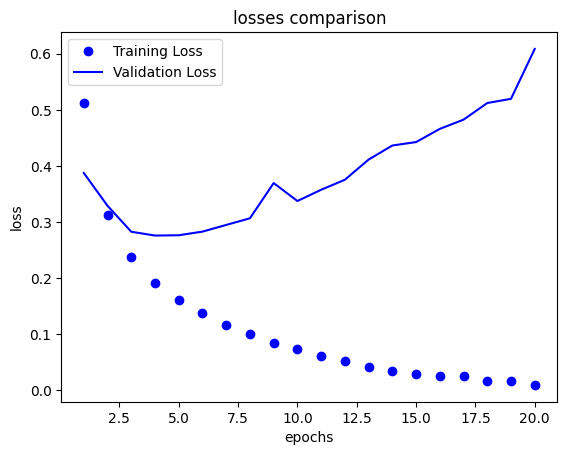

In [29]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc'])+1)

plt.plot(epochs, loss_values, 'bo', label ='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label ='Validation Loss')
plt.title('losses comparison')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

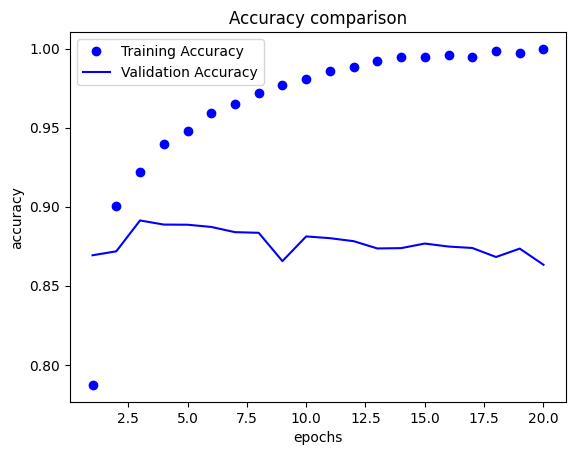

In [30]:
accuracy_values = history_dict['acc']
val_accuracy_values = history_dict['val_acc']

epochs = range(1, len(history_dict['acc'])+1)

plt.plot(epochs, accuracy_values, 'bo', label ='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label ='Validation Accuracy')
plt.title('Accuracy comparison')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()